#TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving blogs.csv to blogs.csv


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('blogs.csv')

# Display the first few rows of the dataset
print(df.head())

# Display the dataset info and check for missing values
print(df.info())
print(df.isnull().sum())


                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
Data      0
Labels    0
dtype: int64


In [ ]:
# Display basic statistics and unique values
print(df.describe(include='all'))
print(df['Labels'].value_counts())  # Check the distribution of categories


                                                     Data       Labels
count                                                2000         2000
unique                                               2000           20
top     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
freq                                                    1          100
Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          10

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing to the text column
df['cleaned_text'] = df['Data'].apply(preprocess_text)


In [ ]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text
X = vectorizer.fit_transform(df['cleaned_text'])

# Convert labels to numerical format
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(df['Labels'])


 Naive Bayes Model for Text Classification

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))


Accuracy: 0.82
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.62      0.83      0.71        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.95      0.76      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94 

Sentiment Analysis

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis to the cleaned text
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

# Analyze sentiment distribution
print(df['sentiment'].value_counts())

# Examine sentiment across different categories
print(df.groupby('Labels')['sentiment'].value_counts())


sentiment
positive    1451
negative     546
neutral        3
Name: count, dtype: int64
Labels                    sentiment
alt.atheism               positive     65
                          negative     35
comp.graphics             positive     72
                          negative     28
comp.os.ms-windows.misc   positive     76
                          negative     24
comp.sys.ibm.pc.hardware  positive     81
                          negative     19
comp.sys.mac.hardware     positive     74
                          negative     26
comp.windows.x            positive     78
                          negative     20
                          neutral       2
misc.forsale              positive     79
                          negative     21
rec.autos                 positive     76
                          negative     24
rec.motorcycles           positive     72
                          negative     28
rec.sport.baseball        positive     65
                          negative   

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.82


In [ ]:
from sklearn.metrics import classification_report

# Display classification report
report = classification_report(y_test, y_pred, target_names=encoder.classes_)
print("Classification Report:\n", report)


Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.62      0.83      0.71        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.95      0.76      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94      0.88      

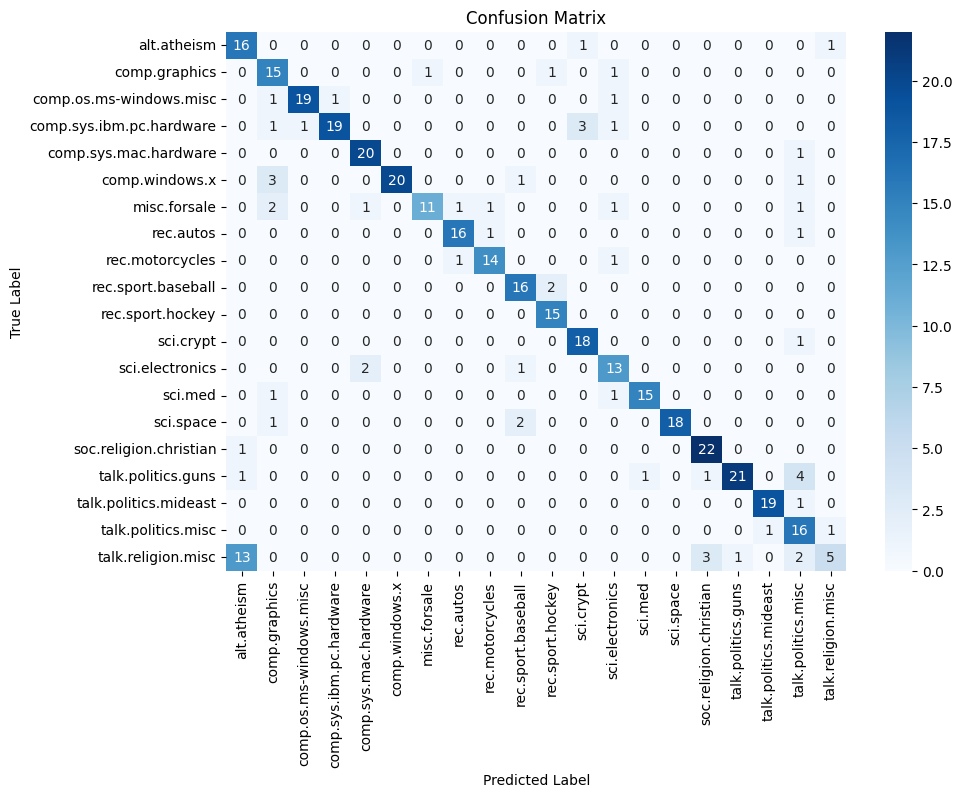

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Distribution of sentiments
sentiment_distribution = df['sentiment'].value_counts()
print("Sentiment Distribution:\n", sentiment_distribution)

# Sentiment distribution across categories
sentiment_by_category = df.groupby('Labels')['sentiment'].value_counts()
print("Sentiment by Category:\n", sentiment_by_category)


Sentiment Distribution:
 sentiment
positive    1451
negative     546
neutral        3
Name: count, dtype: int64
Sentiment by Category:
 Labels                    sentiment
alt.atheism               positive     65
                          negative     35
comp.graphics             positive     72
                          negative     28
comp.os.ms-windows.misc   positive     76
                          negative     24
comp.sys.ibm.pc.hardware  positive     81
                          negative     19
comp.sys.mac.hardware     positive     74
                          negative     26
comp.windows.x            positive     78
                          negative     20
                          neutral       2
misc.forsale              positive     79
                          negative     21
rec.autos                 positive     76
                          negative     24
rec.motorcycles           positive     72
                          negative     28
rec.sport.baseball        posi